In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for LSTM 1
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [3]:
df_orig = pd.read_csv('./dataset/Sample_Data_03/dataset_03_with_header.csv')
dfc = pd.read_csv('C:/Users/malco/Desktop/datasets/Kaggle/UCI_Credit_Card_test.csv')

# train_size = int(len(df_orig)*0.9)
# df_train = df_orig[:train_size]
# df_test = df_orig[train_size:]

# df_train.to_csv('./dataset/Sample_Data_03/dataset_03_with_header_train.csv')
# df_test.to_csv('./dataset/Sample_Data_03/dataset_03_with_header_test.csv')

df = df_orig.copy()

# Split into Train and Test .csv

In [5]:
y = df.loc[:, 'y']
y
y.describe()

count    100000.000000
mean        619.198230
std         118.461932
min         300.000000
25%         524.000000
50%         599.000000
75%         720.000000
max         839.000000
Name: y, dtype: float64

In [6]:
df1 = df.iloc[:, :100]
df1 = pd.concat([y, df1],axis=1)
df1

df2 = df.iloc[:, 100:200]
df2 = pd.concat([y, df2],axis=1)
df2

df3 = df.iloc[:, 200:]
df3 = pd.concat([y, df3],axis=1)
df3

# df1.info()

,y,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,NaN,NaN,NaN,0,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,706
1,558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,4582,4.0,4.0,4.0,0.9256,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5000,5206,5206,0.9339,0,NaN,5206,0.9339,1,1,1,0,NaN,0,NaN,558
2,577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,NaN,NaN,NaN,5,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,577
3,526,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0,4796,4340.0,4000.0,-156,14.0,14.0,14.0000,2,1,1.5200,456,1,1,1,1,0,1,1,1,0,2.0,1,63.0,63.0,63.0,57762,0.8231,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,0,0.8204,62558,4796,1.1153,1,2,2,58218,58218,0,1,1,1,1,0,2.0,63.0,63.0,63.0000,57762,57762,0.8231,57762,0.8231,0,NaN,1,1,1,0,NaN,0,NaN,526
4,496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0,190,186.0,1000.0,710,34.0,25.0,29.5000,3,1,0.6200,186,1,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.1000,190,186,0.1430,1,1,1,190,190,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,578,8,0,5,17,31,34,0,0,1,3,4,0,5,14,25,26,0,5,13,22,22,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.0,500.0,0,NaN,NaN,NaN,1,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,10683,3.0,3.0,3.0,0.9166,1,1,1,0.3308,37362,0,0.0000,0,0,0,30960,0,30960,1,1,1,5,0,5.0,200.0,3.0,157.4000,30960,30960,1.2621,0,NaN,30960,1.2621,1,1,1,1,5.0,20277,1.5749,578
99996,835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1,1,1,1,1,1,0,1,1,5177,5126.0,47500.0,47449,292.0,102.0,197.0000,0,0,NaN,0,1,1,1,1,1,1,1,1,0,1.0,0,163.0,163.0,163.0,31202,0.1431,1,1,1,1,0,80.0,80.0,80.0,NaN,0,0,1,0.0872,36379,0,NaN,0,0,0,36379,0,36379,1,1,1,1,0,1.0,80.0,80.0,80.0000,0,31202,NaN,0,NaN,0,NaN,0,0,1,0,NaN,0,NaN,835
99997,425,11,20,20,20,20,20,7,7,7,7,7,9,9,9,9,9,2,2,2,2,2,1.0,1.0,2,1,1,0,0,0,0,1,1,17958,5663.0,5000.0,-857,35.0,4.0,24.3333,7,2,1.1419,7137,1,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,3156,33.0,30.0,31.5,0.3940,1,1,1,0.4824,31058,27971,0.7732,7,7,7,20507,20237,270,1,1,1,5,5,5.0,33.0,15.0,27.3999,13100,13100,0.5592,13100,0.5592,0,NaN,1,1,1,0,NaN,0,NaN,425
99998,398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,0,0,2,2,699,378.0,300.0,-99,4.0,3.0,3.5000,1,1,1.2600,378,1,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,1.1650,699,378,1.2600,1,1,1,699,378,321,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,398


In [7]:
df1.corr()

,y,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100
y,1.000000,0.164841,0.485744,0.121207,0.419683,0.575970,0.092144,0.008623,-0.021920,-0.001522,0.043654,0.113111,0.117558,0.178163,0.474342,0.308842,0.194172,0.302084,0.410462,0.413284,0.415688,0.242804,0.568884,0.480639,-0.059221,0.487376,0.212508,0.424206,0.414760,0.217832,0.425470,-0.280099,-0.077719,-0.112868,-0.191694,-0.254842,-0.312055,-0.091270,-0.125037,-0.216553,-0.291714,-0.690840,0.293363,0.368446,0.212458,0.145432,0.507595,0.306987,0.195027,0.137282,0.096114,0.059743,0.029612,0.012722,-0.022510,-0.091911,-0.336567,-0.636510,-0.586811,-0.415029,-0.001973,-0.177372,-0.293974,-0.358450,-0.411101,-0.413885,-0.212327,NaN,-0.059887,-0.106879,-0.138074,-0.183339,-0.204699,-0.284965,-0.175537,-0.260677,-0.192416,-0.047028,-0.090930,-0.113628,-0.161110,-0.178198,-0.088651,-0.039574,-0.033738,-0.041799,-0.068299,-0.078563,-0.081274,-0.229252,-0.071259,-0.105102,-0.050871,-0.026350,NaN,NaN,NaN,-0.191670,0.205857,-0.307428,-0.203669
x001,0.164841,1.000000,0.097072,0.025511,0.087469,0.113784,-0.000547,0.010608,-0.044504,-0.030123,-0.003545,0.016469,0.026680,0.038326,0.095711,0.047548,0.030942,0.045983,0.080246,0.082774,0.054282,0.029643,0.097580,0.088210,-0.004985,0.106287,0.060710,0.075518,0.093136,0.055005,0.056276,-0.087867,0.031904,0.044904,-0.009398,-0.081759,-0.100808,0.030165,0.049283,-0.011101,-0.096029,-0.094834,0.068601,0.073201,0.054406,0.034703,0.070108,0.042196,0.032434,0.021463,0.016741,0.007528,0.003773,0.006460,-0.003577,-0.009951,-0.068212,-0.087283,-0.082405,-0.078705,-0.001426,-0.029644,-0.053330,-0.068207,-0.077192,-0.078686,-0.035078,NaN,-0.006926,-0.012900,-0.023347,-0.029957,-0.033926,-0.053823,-0.026289,-0.046238,-0.028962,-0.003561,-0.013555,-0.019475,-0.022006,-0.026910,-0.013206,-0.003895,-0.008080,-0.013437,-0.016121,-0.016656,-0.014090,-0.043615,-0.010002,-0.014983,-0.008011,-0.008791,NaN,NaN,NaN,-0.029942,0.020780,-0.046359,-0.020871
x002,0.485744,0.097072,1.000000,0.297062,0.831371,0.750919,0.120643,-0.129729,-0.157916,-0.081200,-0.021819,0.043906,0.081502,0.143872,0.525007,0.263891,0.213365,0.226280,0.311074,0.328338,0.327244,0.225376,0.379772,0.341642,-0.047485,0.377780,0.082446,0.223222,0.317674,0.128936,0.320575,-0.233853,-0.089168,-0.130631,-0.186278,-0.223656,-0.262189,-0.102764,-0.146585,-0.212877,-0.257432,-0.287362,0.296907,0.309498,0.213113,0.092512,0.393890,0.208095,0.125955,0.087470,0.075828,0.055900,0.043069,0.040788,0.026208,0.014343,-0.131454,-0.210804,-0.317767,-0.200420,0.004498,-0.088482,-0.149214,-0.176933,-0.196854,-0.199829,-0.102195,NaN,-0.032209,-0.056349,-0.070539,-0.089385,-0.099169,-0.135806,-0.083611,-0.110326,-0.100841,-0.019497,-0.042871,-0.057463,-0.080341,-0.088984,-0.106869,-0.031730,-0.027204,-0.043152,-0.071901,-0.088149,-0.097289,-0.105121,-0.042275,-0.042871,-0.021236,-0.016519,NaN,NaN,NaN,-0.077578,0.044321,-0.088190,-0.068000
x003,0.121207,0.025511,0.297062,1.000000,0.705223,0.227947,0.240625,-0.259942,-0.291211,-0.206302,-0.166482,-0.147756,-0.097560,-0.065378,0.021962,-0.185542,-0.259247,-0.106323,-0.162806,-0.306516,-0.126931,-0.212223,-0.072472,-0.208822,-0.148690,0.008237,-0.161155,-0.060263,-0.032325,-0.157491,-0.118051,-0.182966,-0.073843,-0.116832,-0.153428,-0.172722,-0.227441,-0.091193,-0.144028,-0.190729,-0.217026,-0.182778,-0.027359,-0.016733,0.016802,0.149069,-0.035156,-0.070002,-0.088691,-0.086421,-0.089009,-0.091814,-0.096599,-0.098604,-0.108973,-0.123694,-0.091091,-0.243775,-0.070673,0.003201,-0.002337,-0.007786,-0.010467,-0.007265,-0.000565,0.003191,0

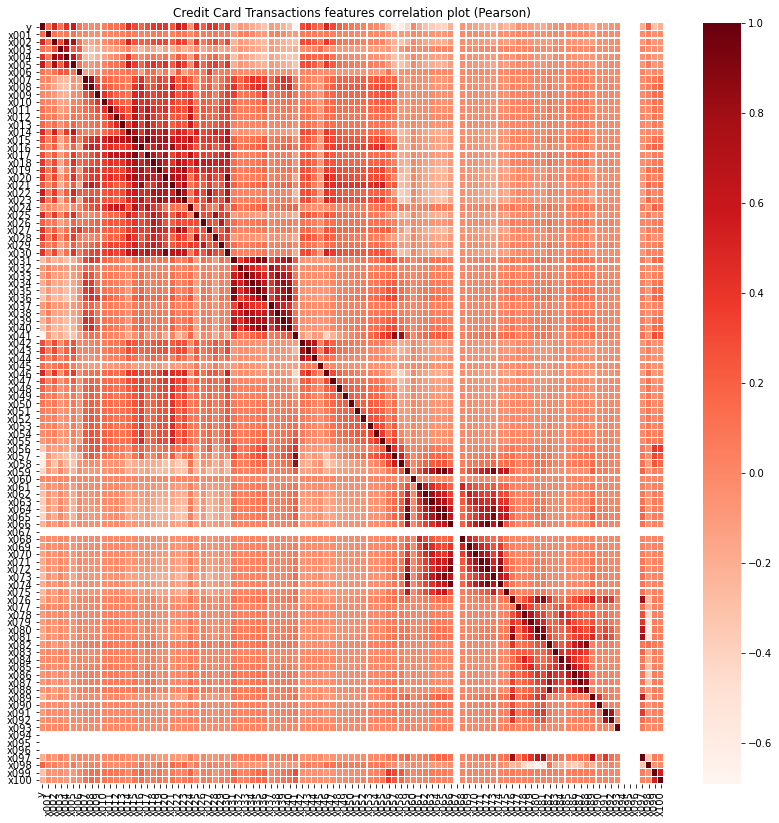

In [8]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
x001,x001,0.000
x002,x002,21.432
x003,x003,21.432
x004,x004,21.424
x005,x005,6.110
x006,x006,0.000
x007,x007,0.000
x008,x008,0.000
x009,x009,0.000
x010,x010,0.000


In [10]:
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
x001,x001,0.000
x178,x178,0.000
x179,x179,0.000
x180,x180,0.000
x181,x181,0.000
x182,x182,0.000
x183,x183,0.000
x184,x184,0.000
x185,x185,0.000
x186,x186,0.000


We can see in x242 column, there are 93% of missing values. 
However, Let's be naive and keep all the data. and do our prediction. Then, we shall impute our missing values. 
and do another round of prediction



In [11]:
#see which columns have missing values, sort according to percent missing
missing_value_df_only = missing_value_df[missing_value_df['percent_missing'] != 0]
missing_value_df_only

,column_name,percent_missing
x005,x005,6.110
x272,x272,7.189
x234,x234,19.110
x045,x045,19.674
x044,x044,19.674
x235,x235,20.083
x004,x004,21.424
x003,x003,21.432
x002,x002,21.432
x287,x287,24.821


<AxesSubplot:xlabel='column_name', ylabel='percent_missing'>

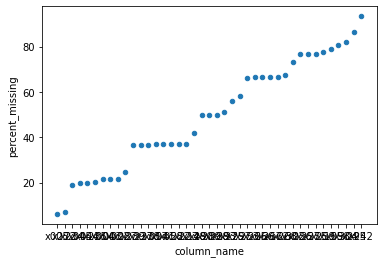

In [12]:
missing_value_df_only.plot(x ='column_name', y='percent_missing', kind = 'scatter')

# Drop >= 67%

In [13]:
#Drop missing values where percent_missing >= 33%
missing_value_df_to_drop_77 = missing_value_df[missing_value_df['percent_missing'] >= 67]
print("missing_value_df_to_drop_77:",missing_value_df_to_drop_77)
col_to_drop_77 = missing_value_df_to_drop_77['column_name'].to_list()
print("col_to_drop_77:",col_to_drop_77)

df_dropped_77perc = df.copy()
df_dropped_77perc.drop(col_to_drop_77, axis=1, inplace = True)
df_dropped_77perc



missing_value_df_to_drop_77:      column_name  percent_missing
x268        x268           67.253
x302        x302           73.069
x256        x256           76.913
x257        x257           76.913
x255        x255           76.913
x259        x259           77.432
x155        x155           79.051
x098        x098           80.681
x304        x304           81.875
x295        x295           86.533
x242        x242           93.339
col_to_drop_77: ['x268', 'x302', 'x256', 'x257', 'x255', 'x259', 'x155', 'x098', 'x304', 'x295', 'x242']


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x258,x260,x261,x262,x263,x264,x265,x266,x267,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x296,x297,x298,x299,x300,x301,x303,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,NaN,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,NaN,NaN,NaN,0,0,0,0,1,1,1,0,0,0,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,1,4582,4.0,4.0,4.0,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5000,5206,5206,0.9339,0,5206,0.9339,1,1,1,0,0,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,NaN,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,NaN,NaN,NaN,5,0,0,0,1,1,1,0,0,0,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,1.5200,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,1.5200,1.5200,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,5,5,2,4,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,0,1,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,1,9,3,6,7,7,7,5,8,9,9,9,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,

### Drop >= 33%

In [14]:
#Drop missing values where percent_missing >= 33%
missing_value_df_to_drop = missing_value_df[missing_value_df['percent_missing'] >= 33]
print("missing_value_df_to_drop:",missing_value_df_to_drop)
col_to_drop = missing_value_df_to_drop['column_name'].to_list()
print("col_to_drop:",col_to_drop)

df_dropped_33perc = df.copy()
df_dropped_33perc.drop(col_to_drop, axis=1, inplace = True)
df_dropped_33perc


missing_value_df_to_drop:      column_name  percent_missing
x239        x239           36.744
x237        x237           36.744
x238        x238           36.744
x057        x057           36.872
x041        x041           36.872
x058        x058           36.872
x222        x222           36.987
x223        x223           37.069
x148        x148           41.785
x290        x290           49.756
x289        x289           49.756
x288        x288           49.756
x293        x293           51.133
x275        x275           56.131
x297        x297           58.112
x253        x253           66.333
x265        x265           66.461
x266        x266           66.461
x267        x267           66.461
x162        x162           66.481
x268        x268           67.253
x302        x302           73.069
x256        x256           76.913
x257        x257           76.913
x255        x255           76.913
x259        x259           77.432
x155        x155           79.051
x098        x098      

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x149,x150,x151,x152,x153,x154,x156,x157,x158,x159,x160,x161,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x240,x241,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x254,x258,x260,x261,x262,x263,x264,x269,x270,x271,x272,x273,x274,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,0,1,1,1,0,0,NaN,0,0,0,0,0,0,0,0,0,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4582,1,1,1,0.9339,5206,0,0,0,0,5206,0,5206,1,1,1,2,0,1.0,5206,5206,0,5206,1,1,1,0,0,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,5,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2281,1613,1613,0,0,0,0,0,0,1,1,1,0,0,NaN,0,0,0,0,0,0,0,0,0,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,5,5,2,4,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,1,9,3,6,7,7,7,5,8,9,9,9,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4796,4340.0,4000.0,-156,2,1,456,1,1,1,1,0,1,1,1,0,1,57762,1,1,1,0,0,0,0,0,0.8204,62558,4796,1,2,2,58218,58218,0,1,1,1,1,0,2.0,57762,57762,57762,0,1,1,1,0,0,526
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,0,0,0,0,3,2,1,2,1,3,2,2,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,900,710,1000.0,300.0,1,0,0,0,0,0,1,0,0,0,0,7,0,1,1,3,7,7,1,0,0,0,0,1,1,3,1,2810,0,0,0,0,0

# Model 1: Perform Simple LSTM as a TIME SERIES
Objective: Perform as a TS and later perform as a non-TS to see if which fares better. #Check

### Normalize Data

In [15]:
df1

,y,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100
0,706,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,NaN,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
1,558,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
2,577,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,NaN,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0,0
3,526,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,1.5200,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,1.5200,1.5200,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,101.0,1,1
4,496,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,0,0,0,0,3,2,1,2,1,3,2,2,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0.2111,900,710,1000.0,300.0,1,0,0,0,0,0,1,0,0,0,0,0.6200,0.0066,7,0,1,1,3,7,7,1,0,0,0,0,1,1,3,1,2810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,578,1573467,200.0,3.0,157.0,200.0,1,3,3,0,0,0,1,0,12,16,5,11,4,2,2,0,1,0,14,0,1,1,0,4,2,7,0,1,3,4,6,0,1,2,3,NaN,0,0,500.0,250.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
99996,835,1653422,292.0,80.0,159.0,292.0,1,1,1,1,2,0,4,3,6,17,4,13,5,3,13,1,3,1,2,1,1,1,1,2,8,2,0,0,1,2,2,0,0,1,2,0.0010,47500,47449,47500.0,100.0,1,0,0,0,0,0,0,0,0,0,0,0.0010,0.0010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
99997,425,1284669,35.0,4.0,26.0,57.0,0,1,1,5,10,4,0,0,0,20,8,12,6,4,11,3,3,1,9,0,1,1,0,2,9,17,0,1,7,8,9,0,1,3,4,1.1308,6550,-857,5000.0,300.0,1,0,0,0,0,0,0,0,1,2,5,1.1792,0.9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,7,0
99998,398,1434877,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,2,2,2,2,0,0,0,1,0,0,1,7,0,2,6,6,6,0,2,5,5,1.1650,600,-99,300.0,300.0,0,0,0,0,0,0,0,0,0,0,2,1.2600,1.0700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,17.0,1,1


In [16]:

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values

	return agg

In [17]:
# call series_to_supervised function
# df1_ = df1.iloc[:,:50]

pd.set_option('max_columns',1000)
values = df1.values
values = values.astype('float32')
values

scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(values)
scaled

# frame as supervised learning
# convert series to supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed

# drop columns we don't want to predict
reframed.drop(reframed.columns[[i for i in range(102,202)]], axis=1, inplace=True) 
# print(reframed.head())
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var38(t-1),var39(t-1),var40(t-1),var41(t-1),var42(t-1),var43(t-1),var44(t-1),var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var54(t-1),var55(t-1),var56(t-1),var57(t-1),var58(t-1),var59(t-1),var60(t-1),var61(t-1),var62(t-1),var63(t-1),var64(t-1),var65(t-1),var66(t-1),var67(t-1),var68(t-1),var69(t-1),var70(t-1),var71(t-1),var72(t-1),var73(t-1),var74(t-1),var75(t-1),var76(t-1),var77(t-1),var78(t-1),var79(t-1),var80(t-1),var81(t-1),var82(t-1),var83(t-1),var84(t-1),var85(t-1),var86(t-1),var87(t-1),var88(t-1),var89(t-1),var90(t-1),var91(t-1),var92(t-1),var93(t-1),var94(t-1),var95(t-1),var96(t-1),var97(t-1),var98(t-1),var99(t-1),var100(t-1),var101(t-1),var1(t)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753247
1,0.753247,0.918371,NaN,NaN,NaN,0.009674,1.0,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005291,0.000000,0.006173,0.0625,0.000000,0.006289,0.000000,0.166667,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.007463,0.009950,0.000000,0.000000,0.000000,0.005682,0.021277,0.00,0.000000,0.00,0.029412,NaN,0.000000,0.010137,0.000027,0.001760,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.478664
2,0.478664,0.490582,0.005571,0.004261,0.004261,0.004837,0.0,0.045455,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010582,0.022989,0.000000,0.1250,0.181818,0.000000,0.000000,0.000000,0.0,0.015504,0.0,1.0,0.0,0.000000,0.021739,0.000000,0.069652,0.205882,0.137931,0.095238,0.062500,0.170213,0.25,0.153846,0.20,0.147059,NaN,0.000000,0.010137,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.044693,0.0,0.045455,0.021739,0.032258,0.032258,0.046512,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.039106,0.000000,0.048754,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.513915
3,0.513915,0.649664,NaN,NaN,NaN,0.116082,1.0,0.000000,0.000000,0.000000,0.030303,0.068182,0.090909,0.023810,0.000000,0.047619,0.000000,0.055556,0.1250,0.000000,0.056604,0.000000,0.333333,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.019900,0.000000,0.000000,0.000000,0.000000,0.021277,0.00,0.000000,0.00,0.000000,NaN,0.000000,0.010137,0.000164,0.001173,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.060606,NaN,NaN,0.016760,0.0,0.000000,0.000000,0.000000,0.000000,0.017442,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007162,0.016667,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.890756,0.000000,0.000000,0.419295
4,0.419295,0.684234,0.087744,0.019886,0.053977,0.311971,0.0,0.000000,0.000000,0.012346,0.060606,0.022727,0.022727,0.023810,0.014706,0.037037,0.022989,0.030864,0.3125,0.181818,0.025157,0.011905,0.500000,0.2,0.023256,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.004975,0.000000,0.000000,0.009524,0.005682,0.021277,0.00,0.000000,0.05,0.029412,0.116954,0.000038,0.010105,0.000364,0.000587,0.00,0.0

In [18]:
reframed = reframed[1:]
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var38(t-1),var39(t-1),var40(t-1),var41(t-1),var42(t-1),var43(t-1),var44(t-1),var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var54(t-1),var55(t-1),var56(t-1),var57(t-1),var58(t-1),var59(t-1),var60(t-1),var61(t-1),var62(t-1),var63(t-1),var64(t-1),var65(t-1),var66(t-1),var67(t-1),var68(t-1),var69(t-1),var70(t-1),var71(t-1),var72(t-1),var73(t-1),var74(t-1),var75(t-1),var76(t-1),var77(t-1),var78(t-1),var79(t-1),var80(t-1),var81(t-1),var82(t-1),var83(t-1),var84(t-1),var85(t-1),var86(t-1),var87(t-1),var88(t-1),var89(t-1),var90(t-1),var91(t-1),var92(t-1),var93(t-1),var94(t-1),var95(t-1),var96(t-1),var97(t-1),var98(t-1),var99(t-1),var100(t-1),var101(t-1),var1(t)
1,0.753247,0.918371,NaN,NaN,NaN,0.009674,1.0,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005291,0.000000,0.006173,0.0625,0.000000,0.006289,0.000000,0.166667,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.007463,0.009950,0.000000,0.000000,0.000000,0.005682,0.021277,0.00,0.000000,0.00,0.029412,NaN,0.000000,0.010137,0.000027,0.001760,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.478664
2,0.478664,0.490582,0.005571,0.004261,0.004261,0.004837,0.0,0.045455,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010582,0.022989,0.000000,0.1250,0.181818,0.000000,0.000000,0.000000,0.0,0.015504,0.0,1.0,0.0,0.000000,0.021739,0.000000,0.069652,0.205882,0.137931,0.095238,0.062500,0.170213,0.25,0.153846,0.20,0.147059,NaN,0.000000,0.010137,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,0.044693,0.0,0.045455,0.021739,0.032258,0.032258,0.046512,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.039106,0.000000,0.048754,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.513915
3,0.513915,0.649664,NaN,NaN,NaN,0.116082,1.0,0.000000,0.000000,0.000000,0.030303,0.068182,0.090909,0.023810,0.000000,0.047619,0.000000,0.055556,0.1250,0.000000,0.056604,0.000000,0.333333,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.019900,0.000000,0.000000,0.000000,0.000000,0.021277,0.00,0.000000,0.00,0.000000,NaN,0.000000,0.010137,0.000164,0.001173,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.060606,NaN,NaN,0.016760,0.0,0.000000,0.000000,0.000000,0.000000,0.017442,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007162,0.016667,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.890756,0.000000,0.000000,0.419295
4,0.419295,0.684234,0.087744,0.019886,0.053977,0.311971,0.0,0.000000,0.000000,0.012346,0.060606,0.022727,0.022727,0.023810,0.014706,0.037037,0.022989,0.030864,0.3125,0.181818,0.025157,0.011905,0.500000,0.2,0.023256,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.004975,0.000000,0.000000,0.009524,0.005682,0.021277,0.00,0.000000,0.05,0.029412,0.116954,0.000038,0.010105,0.000364,0.000587,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.060606,0.097063,0.116954,0.027933,0.0,0.000000,0.000000,0.000000,0.040323,0.029070,0.052632,0.0,0.0,0.0,0.0,0.053571,0.052632,0.027933,0.052632,0.001490,0.016667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.848740,0.034483,0.052632,0.363636
5,0.363636,0.733087,0.047354,0.035511,0.041193,0.041112,1.

In [19]:
reframed_fillna = reframed.copy()

### Lets say you just want to simply use fillna

In [20]:
reframed_fillna.fillna(0, inplace = True) 

In [21]:
reframed_fillna

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var38(t-1),var39(t-1),var40(t-1),var41(t-1),var42(t-1),var43(t-1),var44(t-1),var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var54(t-1),var55(t-1),var56(t-1),var57(t-1),var58(t-1),var59(t-1),var60(t-1),var61(t-1),var62(t-1),var63(t-1),var64(t-1),var65(t-1),var66(t-1),var67(t-1),var68(t-1),var69(t-1),var70(t-1),var71(t-1),var72(t-1),var73(t-1),var74(t-1),var75(t-1),var76(t-1),var77(t-1),var78(t-1),var79(t-1),var80(t-1),var81(t-1),var82(t-1),var83(t-1),var84(t-1),var85(t-1),var86(t-1),var87(t-1),var88(t-1),var89(t-1),var90(t-1),var91(t-1),var92(t-1),var93(t-1),var94(t-1),var95(t-1),var96(t-1),var97(t-1),var98(t-1),var99(t-1),var100(t-1),var101(t-1),var1(t)
1,0.753247,0.918371,0.000000,0.000000,0.000000,0.009674,1.0,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005291,0.000000,0.006173,0.0625,0.000000,0.006289,0.000000,0.166667,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.007463,0.009950,0.000000,0.000000,0.000000,0.005682,0.021277,0.00,0.000000,0.00,0.029412,0.000000,0.000000,0.010137,0.000027,0.001760,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.478664
2,0.478664,0.490582,0.005571,0.004261,0.004261,0.004837,0.0,0.045455,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010582,0.022989,0.000000,0.1250,0.181818,0.000000,0.000000,0.000000,0.0,0.015504,0.0,1.0,0.0,0.000000,0.021739,0.000000,0.069652,0.205882,0.137931,0.095238,0.062500,0.170213,0.25,0.153846,0.20,0.147059,0.000000,0.000000,0.010137,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.044693,0.0,0.045455,0.021739,0.032258,0.032258,0.046512,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.039106,0.000000,0.048754,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.513915
3,0.513915,0.649664,0.000000,0.000000,0.000000,0.116082,1.0,0.000000,0.000000,0.000000,0.030303,0.068182,0.090909,0.023810,0.000000,0.047619,0.000000,0.055556,0.1250,0.000000,0.056604,0.000000,0.333333,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.019900,0.000000,0.000000,0.000000,0.000000,0.021277,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.010137,0.000164,0.001173,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.060606,0.000000,0.000000,0.016760,0.0,0.000000,0.000000,0.000000,0.000000,0.017442,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007162,0.016667,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.890756,0.000000,0.000000,0.419295
4,0.419295,0.684234,0.087744,0.019886,0.053977,0.311971,0.0,0.000000,0.000000,0.012346,0.060606,0.022727,0.022727,0.023810,0.014706,0.037037,0.022989,0.030864,0.3125,0.181818,0.025157,0.011905,0.500000,0.2,0.023256,0.0,0.0,1.0,0.000000,0.000000,0.022388,0.004975,0.000000,0.000000,0.009524,0.005682,0.021277,0.00,0.000000,0.05,0.029412,0.116954,0.000038,0.010105,0.000364,0.000587,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.060606,0.097063,0.116954,0.027933,0.0,0.000000,0.000000,0.000000,0.040323,0.029070,0.052632,0.0,0.0,0.0,0.0,0.053571,0.052632,0.027933,0.052632,0.001490,0.016667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000

In [22]:
# from sklearn.model_selection import train_test_split
# values = reframed_fillna.values
# TS_x_1 = values[:, :-1]
# TS_y_1 = values[:, -1]

# #X_train, X_test, y_train, y_test = train_test_split(TS_x_1, TS_y_1, test_size=0.1,shuffle = False, random_state=10) # accord to sklearn
# train_X, test_X, train_y, test_y = train_test_split(TS_x_1, TS_y_1, test_size=0.1,shuffle = False, random_state=10) #

# Test No. 1

(89999, 1, 101) (89999,) (10000, 1, 101) (10000,)
Epoch 1/50
1250/1250 - 3s - loss: 0.1974 - accuracy: 2.6667e-04 - val_loss: 0.1863 - val_accuracy: 2.0000e-04
Epoch 2/50
1250/1250 - 2s - loss: 0.1873 - accuracy: 2.0000e-04 - val_loss: 0.1859 - val_accuracy: 2.0000e-04
Epoch 3/50
1250/1250 - 2s - loss: 0.1871 - accuracy: 2.0000e-04 - val_loss: 0.1857 - val_accuracy: 2.0000e-04
Epoch 4/50
1250/1250 - 2s - loss: 0.1870 - accuracy: 1.7778e-04 - val_loss: 0.1857 - val_accuracy: 2.0000e-04
Epoch 5/50
1250/1250 - 2s - loss: 0.1869 - accuracy: 1.8889e-04 - val_loss: 0.1857 - val_accuracy: 2.0000e-04
Epoch 6/50
1250/1250 - 2s - loss: 0.1868 - accuracy: 1.8889e-04 - val_loss: 0.1856 - val_accuracy: 2.0000e-04
Epoch 7/50
1250/1250 - 2s - loss: 0.1868 - accuracy: 1.8889e-04 - val_loss: 0.1856 - val_accuracy: 2.0000e-04
Epoch 8/50
1250/1250 - 2s - loss: 0.1868 - accuracy: 1.8889e-04 - val_loss: 0.1856 - val_accuracy: 2.0000e-04
Epoch 9/50
1250/1250 - 2s - loss: 0.1867 - accuracy: 1.8889e-04 - val_

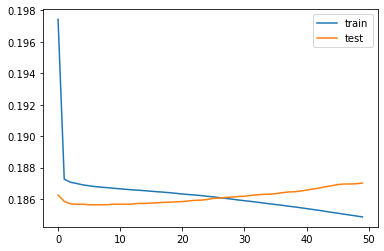

In [60]:
#Train number 1
# split into train and test sets

values = reframed_fillna.values
n_train_hours = int(len(reframed_fillna)*0.9)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', 
              optimizer='adam',
              metrics= ['accuracy'])
# fit network

desired_epoch = 50
history = model.fit(train_X, train_y, epochs=desired_epoch, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()




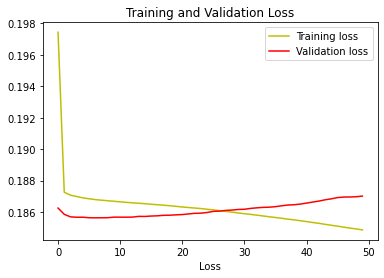

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [i for i in range(desired_epoch)] #range(1, len(loss)+1)
plt.plot(epochs, loss, 'y',label = 'Training loss')
plt.plot(epochs, val_loss, 'r',label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

we can see that bias and Variance converges / where global minima is ~ 30 epochs for batch size of 100. 


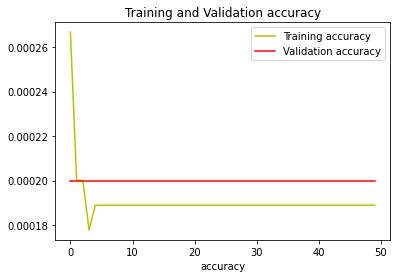

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y',label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r',label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [63]:
# make a prediction
yhat = model.predict(test_X)
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X_reshaped[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X_reshaped[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 120.286


# Test No. 2
Here, we shall add drop out and change loss to rmse because
1. #check
2. #check
We want to increase complexity of the model. decrease fit on the training set (Bias) because Test RMSE of 120 is totally unacceptable as the model was not able to fit to training dataset. Let alone determining Variance. #check

(89999, 1, 101) (89999,) (10000, 1, 101) (10000,)
Epoch 1/5
1800/1800 - 6s - loss: 0.0591 - accuracy: 2.1111e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 2/5
1800/1800 - 5s - loss: 0.0486 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 3/5
1800/1800 - 5s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 4/5
1800/1800 - 5s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 5/5
1800/1800 - 5s - loss: 0.0484 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04


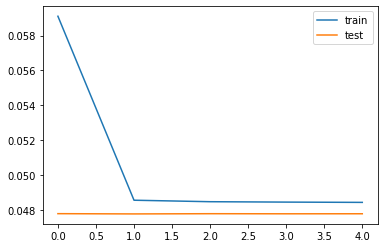

In [64]:
#Train number 2
# split into train and test sets

values = reframed_fillna.values
n_train_hours = int(len(reframed_fillna)*0.9)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(25, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',
              optimizer='adam',
             metrics = ['accuracy'])
# fit network
desired_epoch = 5
history = model.fit(train_X, train_y, epochs=desired_epoch, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

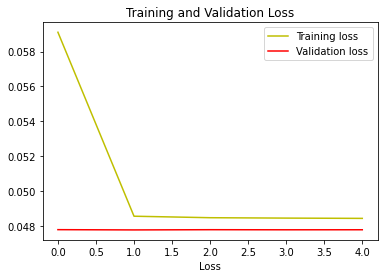

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [i for i in range(desired_epoch)] #range(1, len(loss)+1)
plt.plot(epochs, loss, 'y',label = 'Training loss')
plt.plot(epochs, val_loss, 'r',label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

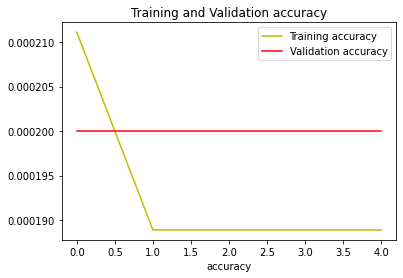

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y',label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r',label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [67]:

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 117.832


# Next Steps

Results are better. However, since these are based on 2 critical factors
1. df1 = first 100 columns
2. df.fillna(0) 
next, we could use KNN Imputer to impute missing values

This is still naive, but we will work up the ladder.
This time, we will use all 300 columns
Followed by imputeing missing values via 
1. Mean
2. Median
3. KNN Imputer


# Model 3: LSTM (Using all 300 columns) To Redo

In [68]:

def get_plot_loss():
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = [i for i in range(desired_epoch)] #range(1, len(loss)+1)
    plt.plot(epochs, loss, 'y',label = 'Training loss')
    plt.plot(epochs, val_loss, 'r',label = 'Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.xlabel('Loss')
    plt.legend()
    plt.show()
    
def get_plot_acc():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = [i for i in range(desired_epoch)] #range(1, len(loss)+1)

    plt.plot(epochs, acc, 'y',label = 'Training accuracy')
    plt.plot(epochs, val_acc, 'r',label = 'Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.xlabel('accuracy')
    plt.legend()
    plt.show()

# make a prediction
def get_pred(test_X,test_y):
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)
    # split into train and test sets


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1,Conver_to_TS_byShifting=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    if Conver_to_TS_byShifting:
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
                # put it all together
        agg = concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        
    else:
        agg = df
    return agg
def get_preprocess_train_test_split_alt(df_model3):
    values = df_model3.values
    values = values.astype('float32')
#     values

    scaler = MinMaxScaler(feature_range = (0,1))
    scaled = scaler.fit_transform(values)
    scaled

    # frame as supervised learning
    # convert series to supervised learning
    reframed = series_to_supervised(scaled, 1, 1, Conver_to_TS_byShifting=True)
    reframed

    # # drop columns we don't want to predict
    reframed.drop(reframed.columns[[i for i in range(306,610)]], axis=1, inplace=True) 
    # print(reframed.head())
    reframed

    reframed = reframed[1:]
    reframed

    reframed_fillna = reframed.copy()

    reframed_fillna.fillna(0, inplace = True) 
    reframed_fillna
    
    values = reframed_fillna.values
    n_train_hours = int(len(reframed_fillna)*0.9)
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    return train_X, train_y, test_X, test_y, scaler

In [69]:
pd.set_option('max_columns',1000)
df_model3 = df.copy()
df_model3.drop('y', axis=1, inplace= True)
df_model3 = pd.concat([y, df_model3],axis=1)
df_model3


,y,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304
0,706,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,NaN,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,NaN,NaN,NaN,0,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN
1,558,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,4582,4.0,4.0,4.0,0.9256,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5000,5206,5206,0.9339,0,NaN,5206,0.9339,1,1,1,0,NaN,0,NaN
2,577,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,NaN,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,NaN,NaN,NaN,5,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN
3,526,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,1.5200,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,1.5200,1.5200,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,101.0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,

(89999, 1, 305) (89999,) (10000, 1, 305) (10000,)
Epoch 1/50
1800/1800 - 6s - loss: 0.0578 - accuracy: 1.8889e-04 - val_loss: 0.0479 - val_accuracy: 2.0000e-04
Epoch 2/50
1800/1800 - 6s - loss: 0.0487 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 3/50
1800/1800 - 6s - loss: 0.0486 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 4/50
1800/1800 - 6s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 5/50
1800/1800 - 6s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 6/50
1800/1800 - 6s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 7/50
1800/1800 - 6s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 8/50
1800/1800 - 6s - loss: 0.0484 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 9/50
1800/1800 - 6s - loss: 0.0484 - accuracy: 1.8889e-04 - val_

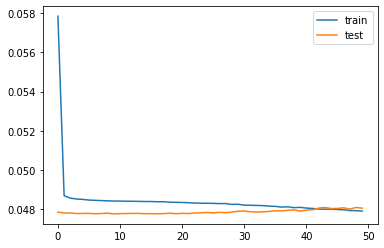

In [70]:
# split into train and test sets
train_X, train_y, test_X, test_y, scaler = get_preprocess_train_test_split_alt(df_model3)
desired_epoch = 50

# design network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(25, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',
              optimizer='adam',
              metrics = ['accuracy'])

# fit network
history = model.fit(train_X, train_y, epochs=desired_epoch, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

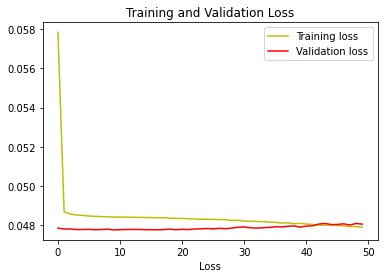

In [71]:
get_plot_loss()

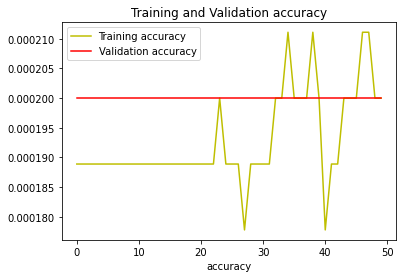

In [72]:
get_plot_acc()

In [73]:
get_pred(test_X,test_y)

Test RMSE: 118.160


# Model 4: Increased Complexity

(89999, 1, 305) (89999,) (10000, 1, 305) (10000,)
Epoch 1/50
1800/1800 - 10s - loss: 0.0670 - accuracy: 2.3334e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 2/50
1800/1800 - 9s - loss: 0.0488 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 3/50
1800/1800 - 9s - loss: 0.0486 - accuracy: 1.8889e-04 - val_loss: 0.0480 - val_accuracy: 2.0000e-04
Epoch 4/50
1800/1800 - 9s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 5/50
1800/1800 - 9s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0479 - val_accuracy: 2.0000e-04
Epoch 6/50
1800/1800 - 9s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 7/50
1800/1800 - 9s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 8/50
1800/1800 - 9s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 9/50
1800/1800 - 9s - loss: 0.0484 - accuracy: 1.8889e-04 - val

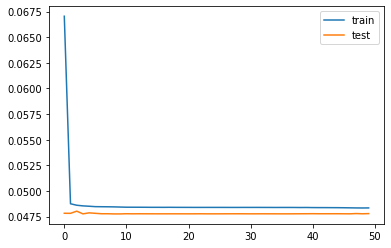

In [74]:
# split into train and test sets
train_X, train_y, test_X, test_y, scaler = get_preprocess_train_test_split_alt(df_model3)
desired_epoch = 50

# design network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(25, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(25, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(25, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',
              optimizer='adam',
              metrics = ['accuracy'])

# fit network
history = model.fit(train_X, train_y, epochs=desired_epoch, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

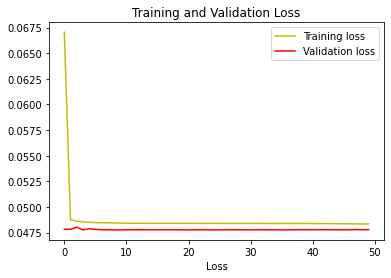

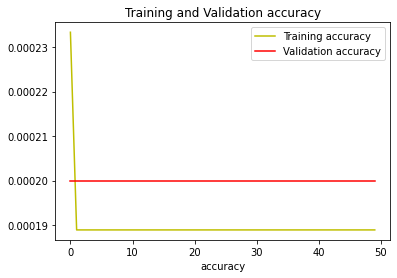

Test RMSE: 117.829


In [75]:
get_plot_loss()
get_plot_acc()
get_pred(test_X,test_y)

# Model 5: non-TS (To Redo)


In [76]:
pd.set_option('max_columns',1000)
df_model5 = df.copy()
df_model5.drop('y', axis=1, inplace= True)
df_model5 = pd.concat([y, df_model5],axis=1)
df_model5

,y,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304
0,706,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,NaN,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,NaN,NaN,NaN,0,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN
1,558,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,4582,4.0,4.0,4.0,0.9256,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5000,5206,5206,0.9339,0,NaN,5206,0.9339,1,1,1,0,NaN,0,NaN
2,577,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,NaN,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,NaN,NaN,NaN,5,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN
3,526,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,1.5200,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,1.5200,1.5200,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,101.0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,

In [77]:
def series_to_supervised(data, n_in=1, n_out=1,Conver_to_TS_byShifting=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    if Conver_to_TS_byShifting:
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
                # put it all together
        agg = concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        
    else:
        agg = df
    return agg

        

    
def get_preprocess_train_test_split_altnonTS(df_model3):
    values = df_model3.values
    values = values.astype('float32')
#     values

    scaler = MinMaxScaler(feature_range = (0,1))
    scaled = scaler.fit_transform(values)
    scaled

    # frame as supervised learning
    # convert series to supervised learning
    reframed = series_to_supervised(scaled, 1, 1, Conver_to_TS_byShifting=False)
#     return reframed

    # # drop columns we don't want to predict
#     reframed.drop(reframed.columns[[i for i in range(306,610)]], axis=1, inplace=True) 
    # print(reframed.head())
#     reframed

    reframed = reframed[1:]
    reframed

    reframed_fillna = reframed.copy()

    reframed_fillna.fillna(0, inplace = True) 
    reframed_fillna
    
    values = reframed_fillna.values
    n_train_hours = int(len(reframed_fillna)*0.9)
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    return train_X, train_y, test_X, test_y, scaler

(89999, 1, 304) (89999,) (10000, 1, 304) (10000,)
train_X: (89999, 1, 305)
train_y: (89999,)
test_X: (10000, 1, 305)
test_y: (10000,)
Epoch 1/50
1800/1800 - 7s - loss: 0.0587 - accuracy: 2.2222e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 2/50
1800/1800 - 6s - loss: 0.0486 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 3/50
1800/1800 - 6s - loss: 0.0486 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 4/50
1800/1800 - 6s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 5/50
1800/1800 - 6s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 6/50
1800/1800 - 6s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 7/50
1800/1800 - 6s - loss: 0.0485 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accuracy: 2.0000e-04
Epoch 8/50
1800/1800 - 6s - loss: 0.0484 - accuracy: 1.8889e-04 - val_loss: 0.0478 - val_accurac

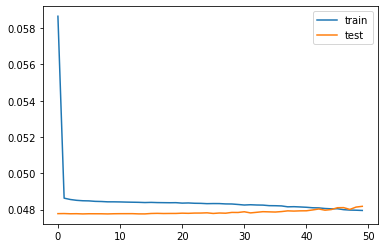

In [78]:
# split into train and test sets
df___= get_preprocess_train_test_split_altnonTS(df_model5)
df___
# train_X, train_y, test_X, test_y, scaler = get_preprocess_train_test_split_alt_nonTS(df_model5)

print("train_X:",train_X.shape)
print("train_y:",train_y.shape)
print("test_X:",test_X.shape)
print("test_y:",test_y.shape)
df_model5
# (80999, 1, 305) (80999,) (9000, 1, 305) (9000,)
# train_X: (80999, 1, 305)
# train_y: (80999,)
# test_X: (9000, 1, 305)
# test_y: (9000,)

desired_epoch = 50

# design network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(25, activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',
              optimizer='adam',
              metrics = ['accuracy'])

# fit network
history = model.fit(train_X, train_y, epochs=desired_epoch, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

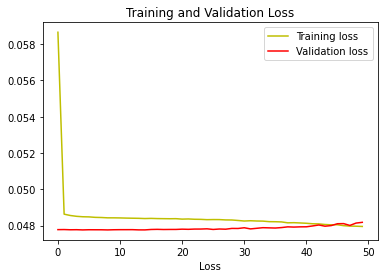

In [79]:
get_plot_loss()


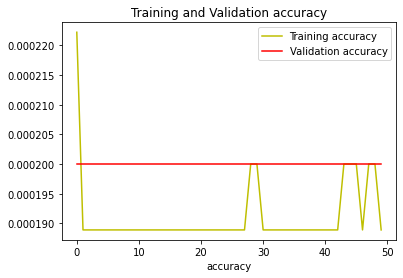

In [80]:
get_plot_acc()


In [81]:
get_pred(test_X,test_y)

Test RMSE: 118.313


# Model 6: Impute missing values
and use all columns.

# Model 10: PyCaret pyc 10
## Dropped all columns >= 33% missing values 
### To check, might still be Naive. #check
### Note: Have to Drop NaN else LinAlgError: SVD did not converge in Linear Least Squares


In [43]:
import numpy as np 
import pandas as pd 
from pycaret.regression import *

In [24]:
reg = setup(data = df_dropped_33perc, 
            train_size = 0.95,
             target = 'y',
             numeric_imputation = 'mean',
#              categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
#                                      'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
#                                      'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
#                                      'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
#                                      'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
#                                      'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
#                                      'SaleCondition']  , 
#              ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize =  True,
             silent = True,
           use_gpu = True)

,Description,Value
0,session_id,5741
1,Target,y
2,Original Data,"(100000, 274)"
3,Missing Values,True
4,Numeric Features,173
5,Categorical Features,100
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(94999, 922)"


In [25]:
#pycca0
import time
tic = time.time()

compare_models()  

toc = time.time()
tac = toc - tic
print('{} seconds'.format(tac))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,20.3970,802.8934,28.3342,0.9428,0.0496,0.0349,2.8640
et,Extra Trees Regressor,20.0602,837.6180,28.9405,0.9403,0.0511,0.0346,115.5420
rf,Random Forest Regressor,20.1967,841.1080,29.0007,0.9400,0.0510,0.0346,78.4970
catboost,CatBoost Regressor,21.6694,871.6202,29.5197,0.9379,0.0519,0.0371,8.2530
gbr,Gradient Boosting Regressor,24.4527,1095.1532,33.0925,0.9219,0.0576,0.0417,177.7050
dt,Decision Tree Regressor,29.8928,1873.7038,43.2847,0.8664,0.0754,0.0510,12.1220
br,Bayesian Ridge,33.8822,2015.9656,44.8971,0.8563,0.0807,0.0585,8.2250
ridge,Ridge Regression,33.8762,2018.7453,44.9284,0.8561,0.0809,0.0585,0.7580
huber,Huber Regressor,33.6292,2081.6098,45.6141,0.8516,0.0825,0.0583,73.1150
knn,K Neighbors Regressor,33.0753,2101.3467,45.8386,0.8502,0.0787,0.0568,127.3420


10090.55912733078 seconds


In [26]:
minutes = tac / 60
print('{} min'.format(minutes))

168.175985455513 min


# Create Model

In [27]:
lgbm  = create_model('lightgbm')      

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20.2772,800.8715,28.2997,0.9430,0.0494,0.0346
1,20.1720,785.0997,28.0196,0.9450,0.0495,0.0346
2,20.4853,819.5362,28.6275,0.9411,0.0502,0.0351
3,20.5748,814.7809,28.5444,0.9420,0.0501,0.0352
4,20.4105,792.0646,28.1436,0.9428,0.0491,0.0348
5,20.0457,780.1532,27.9312,0.9443,0.0490,0.0343
6,20.4325,815.9191,28.5643,0.9425,0.0503,0.0349
7,20.8097,826.4684,28.7484,0.9411,0.0502,0.0355
8,20.2895,796.0767,28.2148,0.9434,0.0492,0.0346
9,20.4724,797.9634,28.2482,0.9423,0.0493,0.0349


# Tune Model

In [28]:
#pyccb0
tuned_lightgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.8581,717.2885,26.7822,0.9489,0.0471,0.0323
1,18.9006,694.6087,26.3554,0.9513,0.0466,0.0325
2,19.2350,728.1906,26.9850,0.9477,0.0474,0.0330
3,18.9917,711.6770,26.6773,0.9494,0.0469,0.0324
4,18.8832,707.1472,26.5922,0.9490,0.0466,0.0322
5,18.6042,696.9518,26.3998,0.9503,0.0464,0.0319
6,19.2705,734.1864,27.0959,0.9482,0.0480,0.0330
7,19.3515,736.7282,27.1427,0.9475,0.0475,0.0331
8,18.7778,695.9309,26.3805,0.9505,0.0463,0.0321
9,18.9833,708.4424,26.6166,0.9488,0.0466,0.0324


# Plot Learning Curve

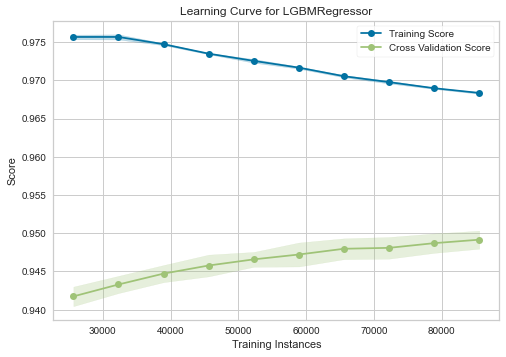

In [29]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

# Residuals Plot	

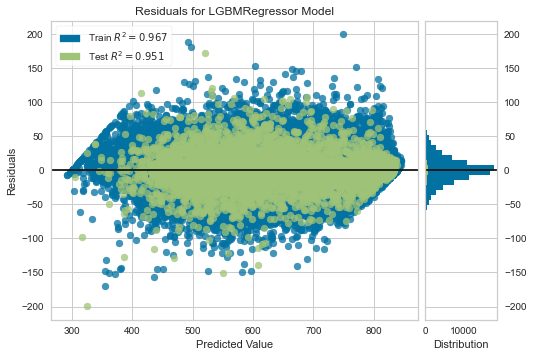

In [30]:
plot_model(estimator = tuned_lightgbm, plot = 'residuals')

# SHAP Values (impact on model output)

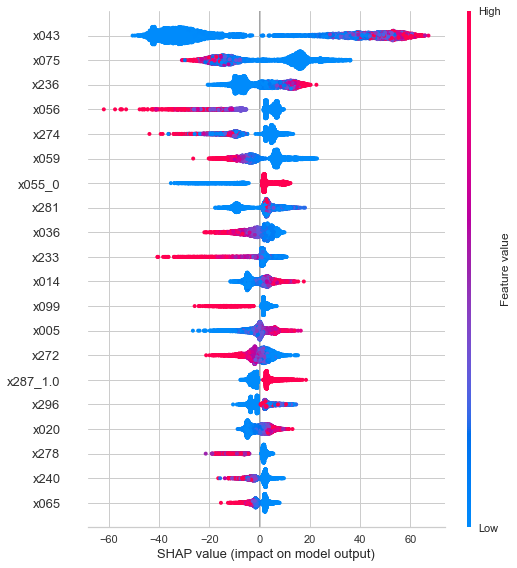

In [31]:
interpret_model(tuned_lightgbm)

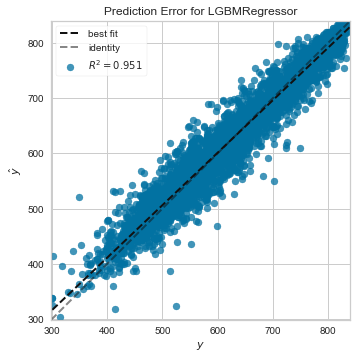

In [32]:
plot_model(estimator = tuned_lightgbm, plot = 'error')

# Predict

In [33]:
final_model = finalize_model(tuned_lightgbm)

In [34]:
#predict
import pandas as pd

train_size = int(len(df_orig)*0.9)
df_train = df_orig[:train_size]
df_test = df_orig[train_size:]

# df_train.to_csv('./dataset/Sample_Data_03/dataset_03_with_header_train.csv')
# df_test.to_csv('./dataset/Sample_Data_03/dataset_03_with_header_test.csv')

data_unseen = df_test
# data_unseen = pd.read_csv('data_unseen.csv') 

In [35]:
predictions = predict_model(final_model, data = data_unseen)


In [37]:
print('predictions:',predictions['y'])

predictions: 90000    487
90001    505
90002    725
90003    501
90004    587
        ... 
99995    578
99996    835
99997    425
99998    398
99999    554
Name: y, Length: 10000, dtype: int64


# Save Model

In [38]:
# save a model
save_model(final_model, 'final_model_Model10v1')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='mea...
                                colsample_bytree=1.0, feature_fraction=0.6,
                                importance_type='split', learning_rate=0.133,
                                max_depth=-1, min_child_samples=70,
                                min_child_weight=0.001, min_split_gain=0.5,
               

# Load Model

In [39]:
final_model = load_model('final_model_Model10v1')

Transformation Pipeline and Model Successfully Loaded


In [41]:
predictions = predict_model(final_model, data = data_unseen)
print('predictions:',predictions['y'])

predictions: 90000    487
90001    505
90002    725
90003    501
90004    587
        ... 
99995    578
99996    835
99997    425
99998    398
99999    554
Name: y, Length: 10000, dtype: int64


IntProgress(value=0, description='Processing: ', max=5)

Finished loading model, total used 220 iterations


KeyboardInterrupt: 

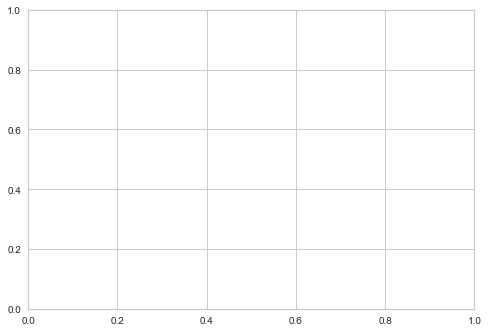

In [29]:
#note this takes a LONG time to run, #started 4.30 pm
plot_model(estimator = tuned_lightgbm, plot = 'rfe')

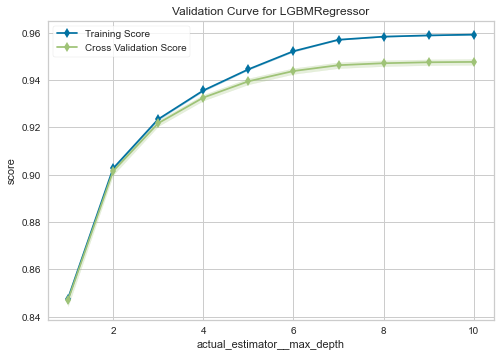

In [30]:
# ~5mins runtime
plot_model(estimator = tuned_lightgbm, plot = 'vc')

In [ ]:
# >20 mins runtime
plot_model(estimator = tuned_lightgbm, plot = 'manifold')

IntProgress(value=0, description='Processing: ', max=5)

Finished loading model, total used 220 iterations


In [ ]:
# print(0*0)
# plot_model(estimator = tuned_lightgbm, plot = 'feature')

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'parameter')

# Model 11: Pycaret pyc11 (df_dropped_33perc)


In [18]:
#Start: 18.47pm
reg = setup(data = df_dropped_33perc, 
             target = 'y',
             numeric_imputation = 'mean',
            feature_selection = True,
            feature_selection_threshold = 0.8, #default
            
            remove_multicollinearity = True, 
            multicollinearity_threshold = 0.9, #default
            
            pca = True, 
            pca_components = .95, #either int / float
            
            # I dont think i prefer this #check, but we set it true to decrease comp time and increase Degree of F
            ignore_low_variance = True, 
            
#              ignore_features = [''],
             normalize =  True,
             silent = True,
           use_gpu = True)

,Description,Value
0,session_id,2927
1,Target,y
2,Original Data,"(100000, 274)"
3,Missing Values,True
4,Numeric Features,172
5,Categorical Features,101
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69999, 95)"


In [19]:
#pycca1
import time
tic = time.time()

compare_models()  

toc = time.time()
tac = toc - tic
print('{} seconds'.format(tac))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,26.9880,1320.6974,36.3361,0.9057,0.0638,0.0463,0.9140
et,Extra Trees Regressor,26.8002,1332.9420,36.5036,0.9049,0.0645,0.0462,21.3620
rf,Random Forest Regressor,27.0357,1363.9435,36.9250,0.9027,0.0650,0.0465,39.9820
catboost,CatBoost Regressor,28.3038,1422.3008,37.7088,0.8985,0.0665,0.0487,6.6300
gbr,Gradient Boosting Regressor,30.8038,1668.6154,40.8442,0.8809,0.0719,0.0530,206.3000
knn,K Neighbors Regressor,33.1019,2092.0069,45.7330,0.8507,0.0786,0.0570,8.7580
lr,Linear Regression,37.9102,2497.6887,49.9701,0.8218,0.0921,0.0652,0.1580
ridge,Ridge Regression,37.9101,2497.6903,49.9701,0.8218,0.0921,0.0652,0.0720
lar,Least Angle Regression,37.9102,2497.6889,49.9701,0.8218,0.0921,0.0652,0.0990
br,Bayesian Ridge,37.9098,2497.7470,49.9707,0.8218,0.0921,0.0652,0.3840


3641.2629952430725 seconds


# Model 12 pyc12 (df_dropped_77perc)

### Note top was careless , i dropped >=33%, supposed to be >= 67%#check

In [22]:
#Drop missing values where percent_missing >= 33%

reg = setup(data = df_dropped_77perc, 
             target = 'y',
             numeric_imputation = 'mean',

             normalize =  True,
             silent = True,
           use_gpu = True)

,Description,Value
0,session_id,1071
1,Target,y
2,Original Data,"(100000, 294)"
3,Missing Values,True
4,Numeric Features,190
5,Categorical Features,103
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69999, 926)"


In [23]:
#pycca2
import time
tic = time.time()

compare_models()  

toc = time.time()
tac = toc - tic
print('{}S, {} mins'.format(tac,tac/60))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,20.0537,775.8961,27.8531,0.9448,0.0488,0.0343,2.5000
catboost,CatBoost Regressor,20.9418,826.0557,28.7380,0.9412,0.0504,0.0358,9.1600
et,Extra Trees Regressor,20.2028,840.6235,28.9915,0.9402,0.0513,0.0349,84.1680
rf,Random Forest Regressor,20.2728,844.0527,29.0497,0.9399,0.0510,0.0348,58.3870
gbr,Gradient Boosting Regressor,23.8131,1044.6953,32.3203,0.9256,0.0563,0.0407,140.0790
br,Bayesian Ridge,32.3122,1865.5737,43.1893,0.8672,0.0816,0.0558,6.5080
ridge,Ridge Regression,32.3283,1871.4756,43.2580,0.8668,0.0825,0.0559,0.5890
dt,Decision Tree Regressor,30.2959,1886.6179,43.4306,0.8657,0.0759,0.0518,9.4040
huber,Huber Regressor,31.9723,1918.9558,43.7992,0.8634,0.0812,0.0554,54.5520
omp,Orthogonal Matching Pursuit,33.1868,1966.3561,44.3422,0.8600,0.0815,0.0573,0.6860


6746.522928476334 seconds


In [26]:
lgbm  = create_model('lightgbm')      

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20.1602,786.0972,28.0374,0.9440,0.0490,0.0344
1,20.1892,788.1035,28.0732,0.9448,0.0491,0.0345
2,20.1023,770.7663,27.7627,0.9454,0.0487,0.0342
3,19.8888,757.0188,27.5140,0.9450,0.0481,0.0340
4,20.2769,800.5296,28.2936,0.9423,0.0496,0.0347
5,19.7609,751.0458,27.4052,0.9460,0.0477,0.0336
6,19.8278,766.2453,27.6811,0.9458,0.0486,0.0340
7,20.4931,806.5269,28.3994,0.9429,0.0501,0.0353
8,20.0039,772.2660,27.7897,0.9459,0.0487,0.0341
9,19.8336,760.3618,27.5747,0.9457,0.0482,0.0338


In [27]:
#pyccb2
tuned_lightgbm = tune_model(lgbm)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19.3497,745.4776,27.3034,0.9469,0.0482,0.0333
1,19.1411,739.9095,27.2013,0.9482,0.0481,0.0329
2,19.1394,726.5968,26.9555,0.9485,0.0477,0.0328
3,18.9806,710.8396,26.6616,0.9483,0.0470,0.0326
4,19.4324,760.1076,27.5700,0.9452,0.0488,0.0334
5,18.8037,694.0397,26.3446,0.9501,0.0463,0.0322
6,18.9162,720.5321,26.8427,0.9491,0.0474,0.0326
7,19.3022,749.3487,27.3742,0.9469,0.0490,0.0335
8,19.0342,732.6990,27.0684,0.9486,0.0479,0.0327
9,18.8212,711.4758,26.6735,0.9492,0.0471,0.0323


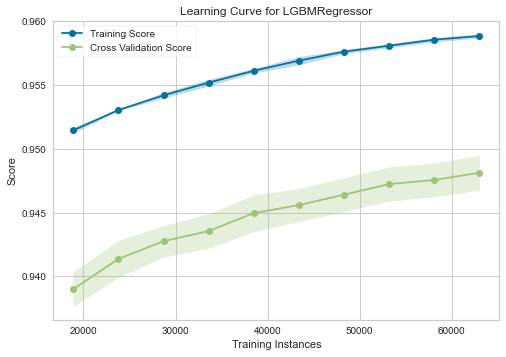

In [28]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

# Model 13 pyc13 (df_dropped_77perc)

In [29]:

reg = setup(data = df_dropped_77perc, 
             target = 'y',
             numeric_imputation = 'mean',# pyc12
             normalize =  True,# pyc12
             silent = True,# pyc12
           use_gpu = True,# pyc12
            
           feature_selection_threshold = 0.95# pyc13 default #0.8 default
           )

# reg = setup(data = df_dropped_33perc, 
#              target = 'y',
#              numeric_imputation = 'mean',
#             feature_selection = True,
#             feature_selection_threshold = 0.8, #default
            
#             remove_multicollinearity = True, 
#             multicollinearity_threshold = 0.9, #default
            
#             pca = True, 
#             pca_components = .95, #either int / float
            
#             # I dont think i prefer this #check, but we set it true to decrease comp time and increase Degree of F
#             ignore_low_variance = True, 
            
# #              ignore_features = [''],
#              normalize =  True,
#              silent = True,
#            use_gpu = True)

,Description,Value
0,session_id,5276
1,Target,y
2,Original Data,"(100000, 294)"
3,Missing Values,True
4,Numeric Features,189
5,Categorical Features,104
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69999, 949)"


In [30]:
#pycca3
tic = time.time()
compare_models()  
toc = time.time()
tac = toc - tic
print('{} seconds'.format(tac))


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,20.0871,780.9099,27.9433,0.9443,0.0489,0.0343,2.3600
catboost,CatBoost Regressor,21.1102,839.8594,28.9665,0.9402,0.0507,0.0361,8.2610
et,Extra Trees Regressor,20.2202,843.1805,29.0358,0.9399,0.0514,0.0349,88.1240
rf,Random Forest Regressor,20.3425,850.2283,29.1573,0.9394,0.0512,0.0349,66.6890
gbr,Gradient Boosting Regressor,23.8823,1052.1687,32.4359,0.9250,0.0564,0.0407,137.2190
br,Bayesian Ridge,32.1712,1854.5154,43.0580,0.8678,0.0790,0.0556,6.9050
ridge,Ridge Regression,32.1792,1858.6357,43.1055,0.8675,0.0793,0.0556,0.6350
dt,Decision Tree Regressor,30.2062,1897.8074,43.5593,0.8647,0.0761,0.0516,9.6660
huber,Huber Regressor,31.8689,1913.4090,43.7329,0.8636,0.0851,0.0552,57.3070
lr,Linear Regression,32.3145,1920.9594,43.8077,0.8630,0.0811,0.0559,2.9850


7038.9759311676025 seconds


In [31]:
lgbm  = create_model('lightgbm')      

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20.0405,780.0101,27.9287,0.9435,0.0490,0.0343
1,19.9927,804.1664,28.3578,0.9436,0.0499,0.0342
2,19.7073,746.3434,27.3193,0.9466,0.0476,0.0336
3,20.2097,787.4240,28.0611,0.9435,0.0493,0.0346
4,20.0835,797.8616,28.2464,0.9433,0.0499,0.0344
5,20.0181,785.1758,28.0210,0.9447,0.0489,0.0340
6,20.1453,766.8098,27.6913,0.9444,0.0481,0.0343
7,20.1899,786.9116,28.0519,0.9437,0.0491,0.0346
8,20.3284,788.9325,28.0879,0.9444,0.0494,0.0349
9,20.1551,765.4643,27.6670,0.9458,0.0481,0.0342


In [32]:
#pyccb3 
tuned_lightgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19.6498,765.9394,27.6756,0.9445,0.0489,0.0338
1,19.7310,777.0050,27.8748,0.9455,0.0490,0.0336
2,19.2032,712.8464,26.6992,0.9490,0.0465,0.0327
3,19.9105,769.6769,27.7431,0.9448,0.0486,0.0340
4,19.9109,796.9763,28.2308,0.9434,0.0500,0.0340
5,19.7244,777.5753,27.8850,0.9452,0.0488,0.0336
6,19.8716,753.7651,27.4548,0.9453,0.0478,0.0339
7,19.8561,767.7437,27.7082,0.9451,0.0486,0.0340
8,20.3398,802.6407,28.3309,0.9434,0.0498,0.0348
9,20.0896,773.9668,27.8203,0.9452,0.0486,0.0341


# AutoKeras

See Notebook Oak_Tree_AutoKeras

# TPOT

See Notebook Oak_Tree_TPOT

# MLBox

See Notebook Oak_Tree_MLBox